<a href="https://colab.research.google.com/github/ibadurrehman1/FastSAM/blob/main/FastSAM_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git

Cloning into 'FastSAM'...
remote: Enumerating objects: 688, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 688 (delta 121), reused 121 (delta 112), pack-reused 526
Receiving objects: 100% (688/688), 65.98 MiB | 23.30 MiB/s, done.
Resolving deltas: 100% (396/396), done.


In [2]:
!wget https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt

--2023-09-04 11:48:01--  https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
Resolving huggingface.co (huggingface.co)... 99.84.66.72, 99.84.66.112, 99.84.66.70, ...
Connecting to huggingface.co (huggingface.co)|99.84.66.72|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/71/c3/71c3ec5a83f3fc374665cec9240f614262e29088fca1a18732571e13c7084f1b/c0be4e7ddbe4c15333d15a859c676d053c486d0a746a3be6a7a9790d52a9b6d7?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27FastSAM.pt%3B+filename%3D%22FastSAM.pt%22%3B&Expires=1694087281&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5NDA4NzI4MX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy83MS9jMy83MWMzZWM1YTgzZjNmYzM3NDY2NWNlYzkyNDBmNjE0MjYyZTI5MDg4ZmNhMWExODczMjU3MWUxM2M3MDg0ZjFiL2MwYmU0ZTdkZGJlNGMxNTMzM2QxNWE4NTljNjc2ZDA1M2M0ODZkMGE3NDZhM2JlNmE3YTk3OTBkNTJhOWI2ZDc%7EcmVzcG9uc2UtY29u

In [3]:
!pip install -r FastSAM/requirements.txt
!pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.7/611.7 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determin

In [4]:
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg

--2023-09-04 11:48:38--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99846 (98K) [image/jpeg]
Saving to: ‘images/dog.jpg’

dog.jpg             100%[===================>]  97.51K  --.-KB/s    in 0.01s   

2023-09-04 11:48:38 (8.68 MB/s) - ‘images/dog.jpg’ saved [99846/99846]



In [5]:
import matplotlib.pyplot as plt
import cv2

In [6]:
image = cv2.imread('images/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

800 534


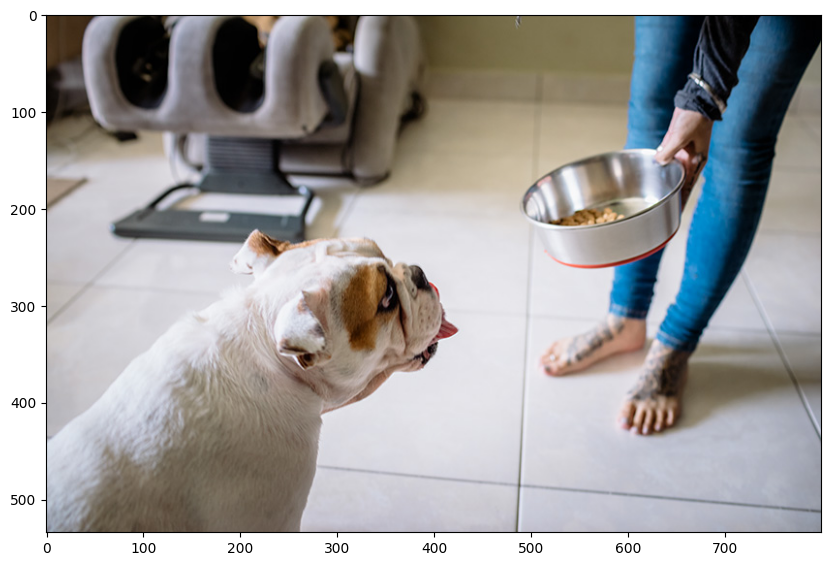

In [7]:
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.imshow(image)

"--imgsz 1024" means the input image size is 1024. Our model was trained on a size of 1024. You can change it to any size you want to input. Using other sizes would produce different segmentation results.

In [8]:
!python FastSAM/Inference.py  --device cuda:0 --model_path FastSAM.pt --img_path ./images/dog.jpg --imgsz 1024


0: 704x1024 35 objects, 124.6ms
Speed: 18.9ms preprocess, 124.6ms inference, 45.0ms postprocess per image at shape (1, 3, 1024, 1024)


In [9]:
# Box prompt (xywh)
!python FastSAM/Inference.py --device cuda:0 --model_path FastSAM.pt --img_path FastSAM/images/dogs.jpg --box_prompt "[[570,200,230,400]]"


0: 576x1024 21 objects, 124.9ms
Speed: 7.7ms preprocess, 124.9ms inference, 7.7ms postprocess per image at shape (1, 3, 1024, 1024)


800 534


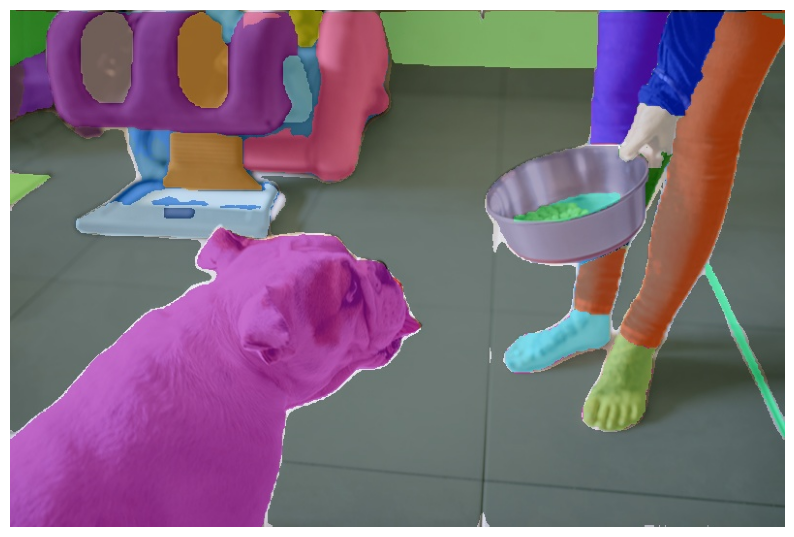

In [10]:
image = cv2.imread('output/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)

In [11]:
!python FastSAM/Inference.py  --device cuda:0 --model_path FastSAM-s.pt --img_path ./images/dog.jpg --imgsz 1024


0: 704x1024 35 objects, 122.6ms
Speed: 8.0ms preprocess, 122.6ms inference, 5.7ms postprocess per image at shape (1, 3, 1024, 1024)


800 534


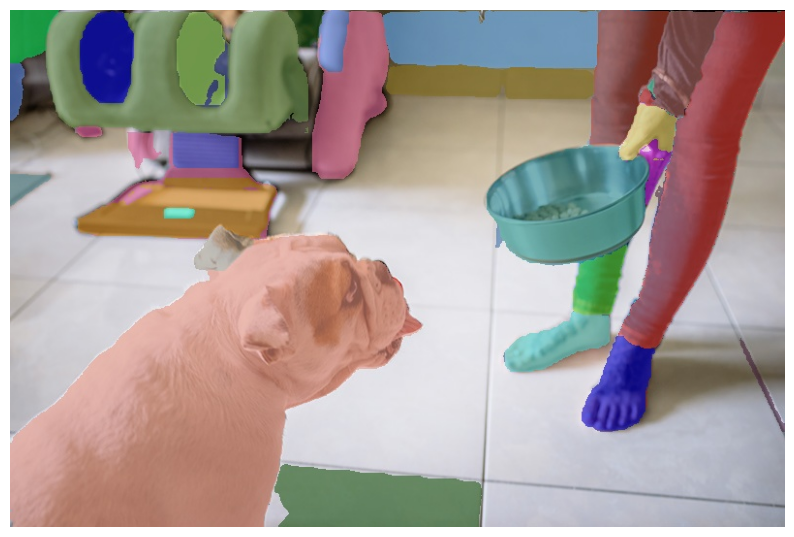

In [12]:
image = cv2.imread('output/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)

In [13]:
# Box prompt (xywh)
!python FastSAM/Inference.py --device cuda:0 --model_path FastSAM.pt --img_path FastSAM/images/dogs.jpg --box_prompt "[[570,200,230,400]]"


0: 576x1024 21 objects, 123.7ms
Speed: 7.7ms preprocess, 123.7ms inference, 4.7ms postprocess per image at shape (1, 3, 1024, 1024)


1072 603


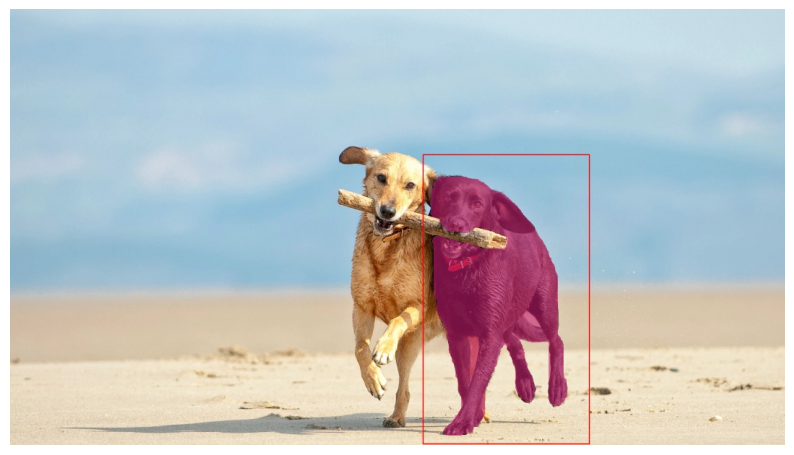

In [15]:
image = cv2.imread('output/dogs.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)

In [16]:
pip install gdown

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1m1sjY4ihXBU1fZXdQ-Xdj-mDltW-2Rqv
To: /content/FastSAM-x.pt
79.9kB [00:00, 34.0MB/s]


'FastSAM-x.pt'

In [21]:
!python FastSAM/Inference.py  --device cuda:0 --model_path /content/drive/MyDrive/FastSAM-x.pt --img_path ./images/dog.jpg --imgsz 1024


0: 704x1024 35 objects, 125.6ms
Speed: 7.0ms preprocess, 125.6ms inference, 5.2ms postprocess per image at shape (1, 3, 1024, 1024)


800 534


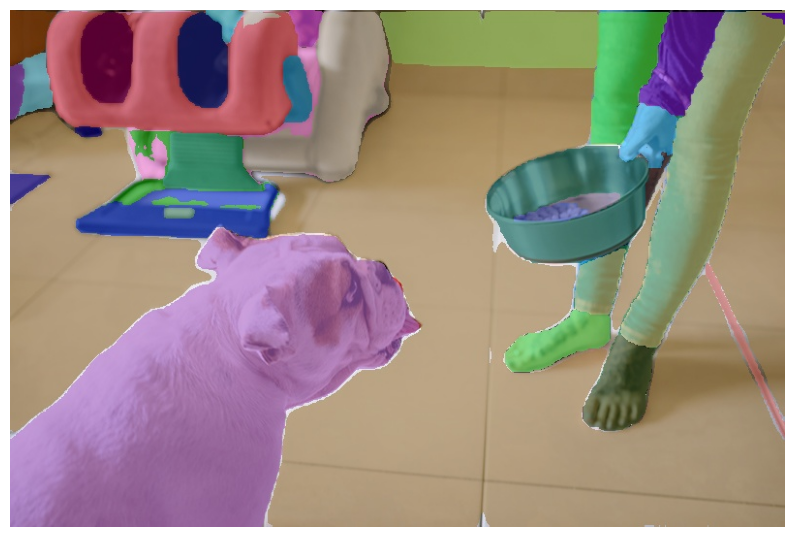

In [22]:
image = cv2.imread('output/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# Box prompt (xywh)
!python FastSAM/Inference.py --device cuda:0 --model_path /content/drive/MyDrive/FastSAM-x.pt --img_path FastSAM/images/dogs.jpg --box_prompt "[[570,200,230,400]]"


0: 576x1024 21 objects, 123.2ms
Speed: 7.7ms preprocess, 123.2ms inference, 6.5ms postprocess per image at shape (1, 3, 1024, 1024)
